In [276]:
%matplotlib inline

In [278]:
import numpy as np

In [280]:
import pandas as pd

In [282]:
import matplotlib.pyplot as plt

In [284]:
df = pd.read_csv("C://Users/302-24/Desktop/stackPerDevice.csv")

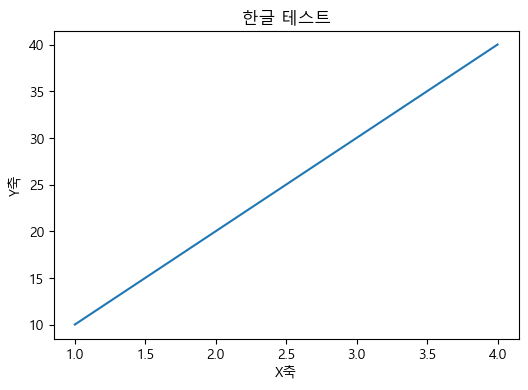

In [286]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: "Malgun Gothic", Mac: "AppleGothic", Linux: "NanumGothic")
plt.rc("font", family="Malgun Gothic")  # Windows (맑은 고딕)

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 테스트 그래프
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3, 4], [10, 20, 30, 40])
plt.title("한글 테스트")  # ✅ 이제 한글이 제대로 표시됨!
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()


In [288]:
print(df.head())

                     deviceId  activity_key  avg_presence  avg_people_cnt  \
0  id_MzA6QUU6QTQ6RTI6RTA6NEM       2769933             0             0.0   
1  id_MzA6QUU6QTQ6RTI6RTA6NEM       2769934             0             0.0   
2  id_MzA6QUU6QTQ6RTI6RTA6NEM       2769936             0             0.0   
3  id_MzA6QUU6QTQ6RTI6RTA6NEM       2769937             0             0.0   
4  id_MzA6QUU6QTQ6RTI6RTA6NEM       2769938             0             0.0   

   avg_activity  max_activity  cnt first_eventtime lastStatus  
0     14.586480       32.6205    5             NaN        NaN  
1      4.635100        9.6501    4             NaN        NaN  
2      5.351220       40.8439   10             NaN        NaN  
3      1.761400        4.7079    3             NaN        NaN  
4      4.397413       18.2786    8             NaN        NaN  


In [290]:
# 필요한 컬럼 데이터 가져오기

deviceid = df["deviceId"].dropna()
cnt = df["cnt"].dropna() # 결측치 제거
avg_activity = df["avg_activity"].dropna()
max_activity = df["max_activity"].dropna()
avg_people_cnt = df["avg_people_cnt"].dropna()

In [292]:
# Figure 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

In [295]:
# Device별 이벤트 발생 횟수 (bar 그래프)
device_event_counts = df.groupby("deviceId")["cnt"].sum()

# 시각화
axes[0, 0].bar(device_event_counts.index, device_event_counts.values, color="skyblue")
axes[0, 0].set_title("Device 별 이벤트 발생 횟수", fontsize=14)
axes[0, 0].set_xlabel("Device ID", fontsize=12)
axes[0, 0].set_ylabel("총 event 발생 횟수", fontsize=12)
axes[0, 0].tick_params(axis="x", rotation=45)

In [297]:
# Device별 평균 활동량 (산점도)
axes[0, 1].scatter(deviceid, avg_activity, color="pink", alpha=0.5)
axes[0, 1].set_title("Device별 평균 활동량 (산점도)")
axes[0, 1].set_xlabel("Device ID")
axes[0, 1].set_ylabel("Avg Activity")
axes[0, 1].tick_params(axis="x", rotation=45)

In [298]:
# Device별 최대 활동량 변화 (점선)
axes[1, 0].plot(deviceid, max_activity, "k--")
axes[1, 0].set_title("Device별 최대 활동량")
axes[1, 0].set_xlabel("Device ID")
axes[1, 0].set_ylabel("Max Activity")
axes[1, 0].tick_params(axis="x", rotation=45)

In [300]:
axes[1, 1].plot(deviceid, avg_people_cnt, "k--")
axes[1, 1].set_title("Device별 평균 인원 수")
axes[1, 1].set_xlabel("Device ID")
axes[1, 1].set_ylabel("average people")
axes[1, 1].tick_params(axis="x", rotation=45)

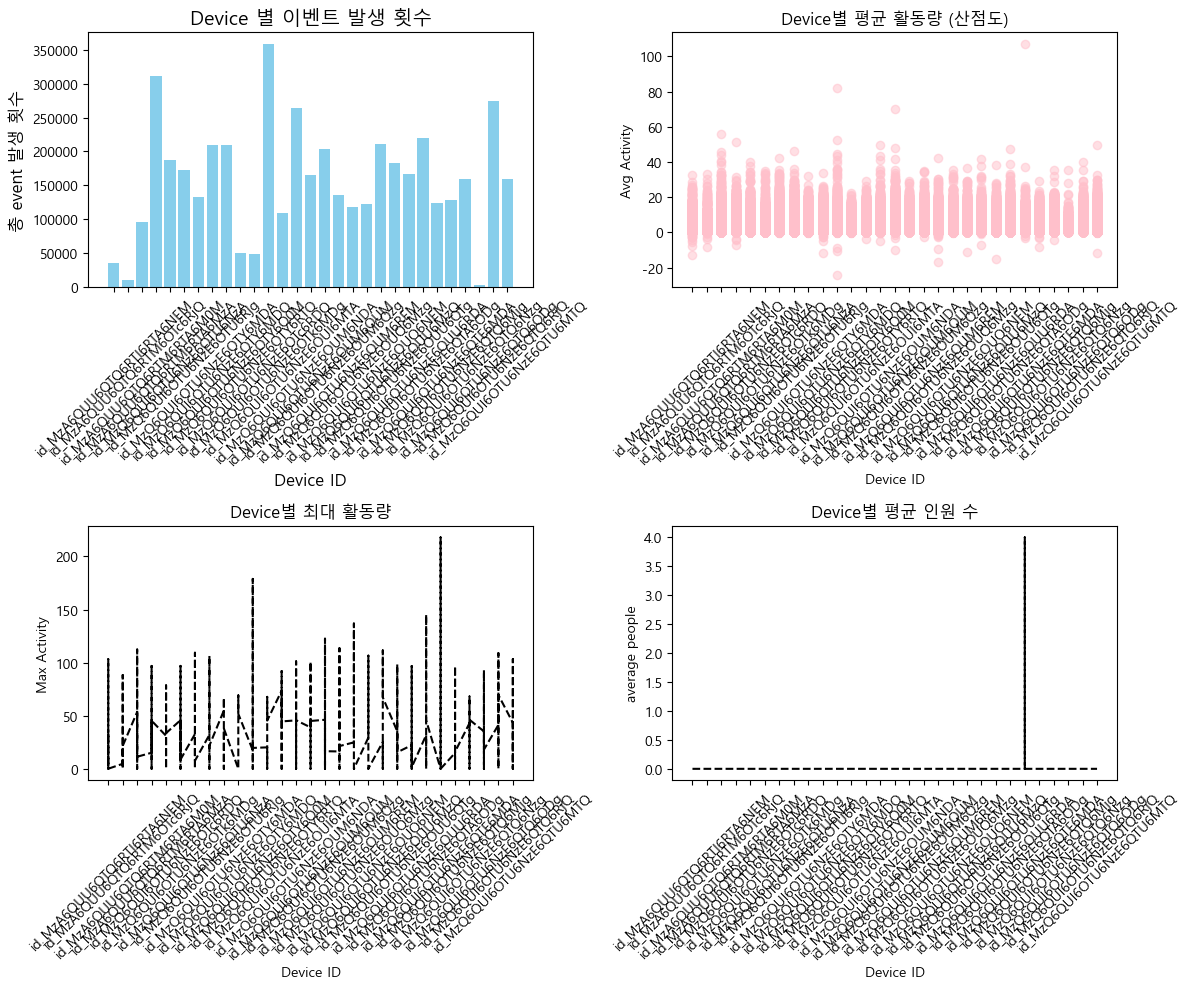

In [302]:
plt.tight_layout()
plt.show()